In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
pf = pd.read_csv("listings.csv")

Quel sont les pourcentages d'acceptation et de réponse moyen des host ?

In [4]:
pf.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
listGroupbyNeight =  pf.groupby(pf.neighbourhood_group_cleansed)
listGroupbyNeight.host_id.nunique()


In [ ]:
listGroupbyNeight.number_of_reviews.sum()

In [ ]:
listGroupbyNeight.number_of_reviews.count()

ON A DONC LA REPONSE A LA QUESTION 1

In [ ]:
truc = pf[["room_type","amenities"]]
truc.amenities = truc.amenities.astype("string")
truc["lenght"] = truc.amenities.str.count(",")
truc["lenght"] = truc.lenght.astype(int)
truc.lenght.apply(lambda x:x+1)

In [ ]:
q1 = truc.groupby("room_type").mean()

In [ ]:
q1.to_csv("premiere_question.csv")

In [ ]:
q1_2 = truc.groupby("room_type").std() 
q1_2.to_csv("premierequestiond.csv")

In [ ]:
listingPrice = pf[["room_type","price"]]
listingPrice["price"] = listingPrice["price"].str.replace("$","").str.replace(",","").astype("float")
quartile_et_autre = listingPrice.groupby(listingPrice.room_type).describe()

In [ ]:
quartile_et_autre

VOICI LA REPONSE A :Quel est le prix median par type de room, le maximum, le minimum, le premier et le troisième quartile?

In [ ]:
quartile_et_autre.to_csv("quartile_et_autre.csv")

In [ ]:
pf.host_acceptance_rate.str.rstrip("%").astype(float).mean()

In [ ]:
pf.host_response_rate.str.rstrip("%").astype(float).mean()

In [ ]:
pf.replace(to_replace="work_email", value='work', regex=True,inplace=True)

In [ ]:
listingPhone =  pf["host_verifications"].apply( lambda x : 1 if "phone" in x else 0).sum()



listingWorkEmail = pf["host_verifications"].apply( lambda x : 1 if "work" in x else 0).sum()


listingEmail = pf["host_verifications"].apply( lambda x : 1 if "email" in x else 0).sum()



ON PASSE A LA QUESTION SUR LES BATHS 

In [ ]:
pf.bathrooms_text.unique()

In [ ]:
pf.bathrooms_text = pf.bathrooms_text.astype("string")

In [ ]:
pf.bathrooms_text.dtypes

In [ ]:
pf.dropna(subset = ['bathrooms_text'])

In [ ]:
pf["Bath"] = pf["bathrooms_text"]


In [ ]:
pf["Bath"].unique()

In [ ]:
pf["Bath"] = pf["Bath"].str.replace("baths","bath")

In [ ]:
pf["Bath"] = pf["Bath"].str.lower()

In [ ]:
# pf[["nb","type"]] = pf["Bath"].str.split(" ",1,expand=True)

In [ ]:
pf["Bath"] = pf["Bath"].str.replace("private bath","2")

In [ ]:
pf["Bath"] = pf["Bath"].str.replace("shared half-bath","1 0.25")

In [ ]:
pf["Bath"] = pf["Bath"].str.replace("private half-bath","1 1")

In [ ]:
pf["Bath"] = pf["Bath"].str.replace("half-bath","1 0.5")

In [ ]:
pf["Bath"] = pf["Bath"].str.replace("shared bath","0.5")

In [ ]:
pf["Bath"] = pf["Bath"].str.replace("bath","1")

In [ ]:
#pf["Bath"] = pf["Bath"].str.replace("half-bath","0.5-")

In [ ]:
pf["Bath"].dropna()

In [ ]:
pf.Bath.dropna().unique()

In [ ]:
pf[["nb","type"]] = pf["Bath"].str.split(" ",1,expand=True)

In [ ]:
pfNb = pf.nb.dropna()
pfNb

In [ ]:
pf["Bath"].unique()

In [ ]:
pfType = pf.type.dropna()
pfType

In [ ]:
pf["nb"]=pf["nb"].astype(float)
pf["type"]=pf["type"].astype(float)

In [ ]:
pf["popo"] = pf["nb"]*pf["type"]

In [ ]:
lesbath= pf.nb.groupby(pf.popo).count()

VOICI LA REPONSE A LA QUESTION SUR LES BATHS

In [ ]:
lesbath.to_csv("lesbath.csv")

ON A ENFIN NOTRE REPONSE

In [ ]:
pf.columns

on se demande si il y a une correlation entre la taille de la description et le nombre de reviews

In [ ]:
pf.nb

In [ ]:
pf.description

In [ ]:
pf["description"] = pf.description.astype("string")

In [ ]:
pf = pf.dropna(subset=['description'])

In [ ]:
pf["lenghth"] = pf.description.apply(len)

In [ ]:
pf["lenghth"].unique()

In [ ]:
pf.number_of_reviews.corr(pf["lenghth"])

VOICI NOTRE REPONSE POUR LA CORROLATION


il y a une légère corrolation 

In [ ]:
pf.name

In [ ]:
pf.info()


On suspecte des faux commentaires. Pour identifier cela on regarde les séjours où le nom de l’host est le même que le nom du reviewer. Quel est ce pourcentage général de séjour où le nom de l'host est identique au nom du reviewer?

comme on a pas le nom du reviewer dans listing , mais dans reviews , on va devoir "merge" listingsB et reviews 

In [6]:
revdf = pd.read_csv("reviewsdet.csv")

In [7]:
pf["comments"]= pf["description"]

In [8]:
revdf.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [9]:
revdf.reviewer_id

0            610681
1           2005513
2           1937156
3           2001261
4           1766812
            ...    
306351     40877952
306352    151433357
306353    422815067
306354    270567347
306355      7357008
Name: reviewer_id, Length: 306356, dtype: int64

In [10]:
pp = pf.merge(revdf, left_on='id', right_on='listing_id')  

In [11]:
tricheur = pp[pp['host_name']==pp['reviewer_name']].shape[0]

In [12]:
tricheur

566

In [13]:
equal_percent = tricheur/pp.shape[0]*100  

In [14]:
pp.shape[0]

306356

In [15]:
equal_percent

0.18475237958453564

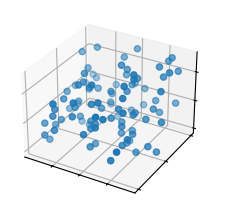

In [51]:

plt.style.use('_mpl-gallery')
# Make data
np.random.seed(1968070)
n = 100
rng = np.random.default_rng()
xs = rng.uniform(23, 32, n)
ys = rng.uniform(0, 100, n)
zs = rng.uniform(-50, -25, n)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xs, ys, zs)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()